In [1]:
from landmark_detection.pipeline import Pipeline_Yolo_CVNet_SG
from landmark_detection.utils import show_image, show_bboxes, show_similarity_search

import os
import pandas as pd
import pickle
import numpy as np

In [2]:
DATASETS_PATH = os.path.abspath("datasets")

CACERES_CSV = os.path.join(DATASETS_PATH, "caceres", "caceres_dataset.csv")
CACERES_DF = os.path.join(DATASETS_PATH, "caceres", "results", "df_caceres-v1.pkl")
CACERES_DESC = os.path.join(DATASETS_PATH, "caceres", "results", "desc_caceres-v1.pkl")

TEST_PLACES_DB = os.path.join("landmark_detection", "test_data", "test_places_db.pkl")

caceres_csv = pd.read_csv(CACERES_CSV)

with open(CACERES_DF, 'rb') as f:
    caceres_df = pickle.load(f)

with open(CACERES_DESC, 'rb') as f:
    caceres_desc = pickle.load(f)

# Crear columna sin extensión en df_result_cac
caceres_df["filename"] = caceres_df["image_name"].str.replace(".jpg", "", regex=False)

# Hacer el merge con caceres_dataset para obtener el landmark_id
df_merged = caceres_df.merge(caceres_csv[["filename", "landmark_id"]], on="filename", how="left")

# Obtener el tensor de landmark_id
places_id = df_merged["landmark_id"].values

caceres_desc_ids = np.concatenate((caceres_desc, places_id[:, None]), axis=1)

with open(TEST_PLACES_DB, 'wb') as f:
    pickle.dump(caceres_desc_ids, f)

In [3]:
pipeline = Pipeline_Yolo_CVNet_SG(
        detector_file = "yolov8n-oiv7.pt",
        extractor_onnx_file = "cvnet-sg-v1.onnx",
        pipeline_onnx_file = "pipeline-yolo-cvnet-sg-v1.onnx",
        image_dim = (640, 640),
        allowed_classes = [41,68,70,74,87,95,113,144,150,158,164,165,193,205,212,224,257,
                                      298,310,335,351,354,390,393,401,403,439,442,457,466,489,510,512,
                                      514,524,530,531,543,546,554,565,573,580,587,588,591],
        score_thresh = 0.05,
        iou_thresh = 0.25,
        scales = [0.7071, 1.0, 1.4142],
        mean = [0.485, 0.456, 0.406],
        std  = [0.229, 0.224, 0.225],
        rgem_pr = 2.5,
        rgem_size = 5,
        gem_p = 4.6,
        sgem_ps = 10.0,
        sgem_infinity = False,
        eps = 1e-8,
        topk = 5,
        min_sim = 0.8,
        min_votes = 0.55,
        remove_inner_boxes = 0.85,
        join_boxes = True
)

Creando versión ONNX del detector
Ultralytics 8.3.146  Python-3.11.11 torch-2.7.0+cpu CPU (Intel Core(TM) i5-9300HF 2.40GHz)
YOLOv8n summary (fused): 72 layers, 3,492,527 parameters, 0 gradients, 10.5 GFLOPs

PyTorch: starting from 'C:\Users\rdiaz\Documents\GitHub\landmark-detection-with-retrieval\landmark_detection\models\yolov8n-oiv7.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 605, 8400) (6.9 MB)

ONNX: starting export with onnx 1.17.0 opset 16...
ONNX: slimming with onnxslim 0.1.54...
ONNX: export success  3.3s, saved as 'C:\Users\rdiaz\Documents\GitHub\landmark-detection-with-retrieval\landmark_detection\models\yolov8n-oiv7.onnx' (13.5 MB)

Export complete (4.3s)
Results saved to C:\Users\rdiaz\Documents\GitHub\landmark-detection-with-retrieval\landmark_detection\models
Predict:         yolo predict task=detect model=C:\Users\rdiaz\Documents\GitHub\landmark-detection-with-retrieval\landmark_detection\models\yolov8n-oiv7.onnx imgsz=640  
Validate:        yolo 

In [4]:
TEST_IMG_PATH = os.path.join("test_images", "caceres.jpg")
TEST_PLACES_DB = os.path.join("landmark_detection", "test_data", "test_places_db.pkl")
DATASETS_PATH = os.path.abspath("datasets")
CACERES_LANDMARK_NAMES_PATH = os.path.join(DATASETS_PATH, "caceres", "caceres_landmarks.yaml")

with open(TEST_PLACES_DB, 'rb') as f:
    places_db = pickle.load(f)
    
final_boxes, final_scores, final_classes = pipeline.run(TEST_IMG_PATH, places_db)

Encontradas 19 cajas:
  Clase 0 Arco de la Estrella @ -inf → [inf,inf,-inf,-inf]
  Clase 1 Torre de Bujaco @ 0.82 → [1992.1,594.7,2160.0,746.6]
  Clase 2 Concatedral de Santa María @ -inf → [inf,inf,-inf,-inf]
  Clase 3 Palacio de los Golfines de Abajo @ -inf → [inf,inf,-inf,-inf]
  Clase 4 Palacio de Carvajal @ -inf → [inf,inf,-inf,-inf]
  Clase 5 Casa de las Veletas @ 0.83 → [1526.0,567.3,1941.0,793.8]
  Clase 6 Iglesia de San Francisco Javier @ 0.88 → [900.4,437.6,1352.9,1029.0]
  Clase 7 Judería Vieja @ 0.82 → [2017.4,994.5,2452.8,1297.8]
  Clase -1 full image @ 0.00 → [0.0,0.0,2496.1,1660.4]
  Clase -1 full image @ 0.00 → [26.2,423.6,2498.2,1661.6]
  Clase -1 full image @ 0.00 → [1108.0,1478.9,1185.4,1544.8]
  Clase -1 full image @ 0.00 → [1839.6,496.5,1953.1,714.2]
  Clase -1 full image @ 0.00 → [1401.0,1370.5,1454.4,1420.6]
  Clase -1 full image @ 0.00 → [1285.2,1495.5,1375.8,1608.3]
  Clase -1 full image @ 0.00 → [941.0,1621.4,1013.8,1662.5]
  Clase -1 full image @ 0.00 → [926.

C:\ProgramData\anaconda3\envs\tfm_yolo\Lib\site-packages\matplotlib\patches.py:796: RuntimeWarning: invalid value encountered in scalar add
  x1 = self.convert_xunits(self._x0 + self._width)
C:\ProgramData\anaconda3\envs\tfm_yolo\Lib\site-packages\matplotlib\patches.py:797: RuntimeWarning: invalid value encountered in scalar add
  y1 = self.convert_yunits(self._y0 + self._height)


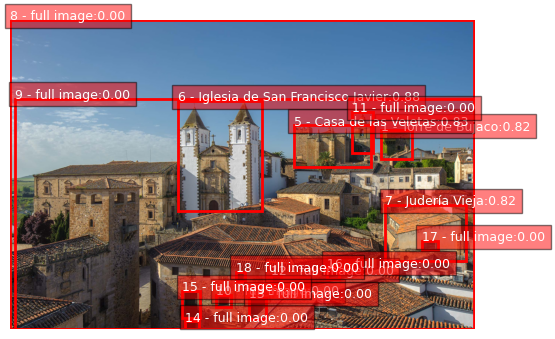

In [5]:
show_bboxes(TEST_IMG_PATH, CACERES_LANDMARK_NAMES_PATH, final_boxes, final_classes, final_scores)